# Waffle Charts, Word Cloud and Regression Plots.

The first and most significant step is to import the important libraries. We will use the inline backend to generate the plots within the browser.

### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
mpl.style.use('ggplot')

!pip install seaborn wordcloud
import seaborn as sns
import wordcloud

print('Matplotlib Vesrion: ', mpl.__version__ )
print('Seaborn Version: ', sns.__version__ )
print('Wordcloud Version: ', wordcloud.__version__ )
print('Done')



Matplotlib Vesrion:  3.7.1
Seaborn Version:  0.12.2
Wordcloud Version:  1.9.3
Done


## Data Sourcing/Fetching

Toolkits: This course heavily relies on pandas and numpy for data wrangling, analysis and visualization. The primary plotting library we will explore in this project is matplotlib.

The data is the Dataset: Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows) from United Nation's website

We will focus on the Canadian Immigration data and use the **already cleaned dataset** and can be fetched from <a href="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv">here</a>.<br><br>

I also have the cleaned dataset saved in my system already but we will be getting the dataset from the link below:

Download the Canadian Immigration dataset and read it into a *pandas* dataframe.


In [2]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')

print('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's take a look at the first five items in our dataset


In [3]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


Let's find out how many entries there are in our dataset


In [4]:
print('The data entries are: ', df_can.shape )

The data entries are:  (195, 39)


In [5]:
# set Country as index

df_can.set_index('Country', inplace=True)

# Waffle Charts <a id="3"></a>

A `waffle chart` is an interesting visualization that is normally created to display progress toward goals. It is commonly an effective option when you are trying to add interesting visualization features to a visual that consists mainly of cells, such as an Excel dashboard.


Let's revisit the previous case study about Denmark, Norway, and Sweden.


In [6]:
# creating a new dataframe

df_dns = df_can.loc[['Denmark', 'Norway', 'Sweden'], : ]

# display the new dataframe
df_dns

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


`Waffle` charts are not built into any of the Python visualization libraries. Therefore, we will learn how to create them from scratch.


**Step 1.** The first step into creating a waffle chart is determing the proportion of each category with respect to the total.


In [8]:
total_values = df_dns['Total'].sum()
category_prop = df_dns['Total'] / total_values

pd.DataFrame({'Category Proportions': category_prop})

,Category Proportions
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


**Step 2.** The second step is defining the overall size of the `waffle` chart.


In [9]:
width = 40
height = 10

total_num_tiles = width * height

print('Total number of Tiles is ', total_num_tiles)

Total number of Tiles is  400


**Step 3.** The third step is using the proportion of each category to determe it respective number of tiles


In [11]:
tiles_per_category = (category_prop * total_num_tiles).round().astype(int)

pd.DataFrame({'Number of Tiles': tiles_per_category})

,Number of Tiles
Country,
Denmark,129
Norway,77
Sweden,194


Based on the calculated proportions, Denmark will occupy 129 tiles of the `waffle` chart, Norway will occupy 77 tiles, and Sweden will occupy 194 tiles.


**Step 4.** The fourth step is creating a matrix that resembles the `waffle` chart and populating it.


In [14]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


Let's take a peek at how the matrix looks like.


In [15]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

As expected, the matrix consists of three categories and the total number of each category's instances matches the total number of tiles allocated to each category.


**Step 5.** Map the `waffle` chart matrix into a visual.


<Figure size 640x480 with 0 Axes>

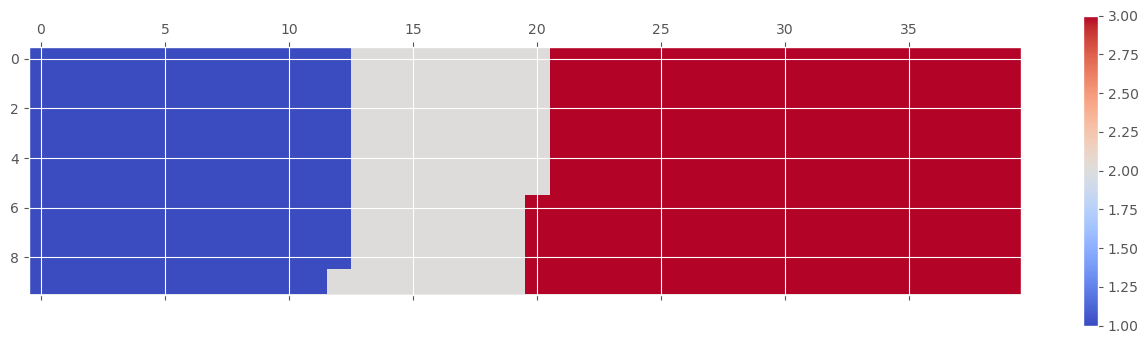

In [16]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

**Step 6.** Prettify the chart.


<Figure size 640x480 with 0 Axes>

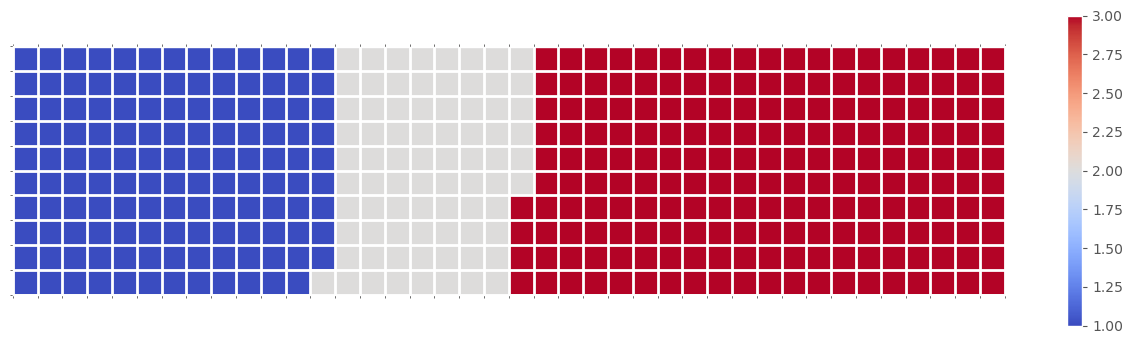

In [17]:
fig = plt.figure()

colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

**Step 7.** Create a legend and add it to chart.


<Figure size 640x480 with 0 Axes>

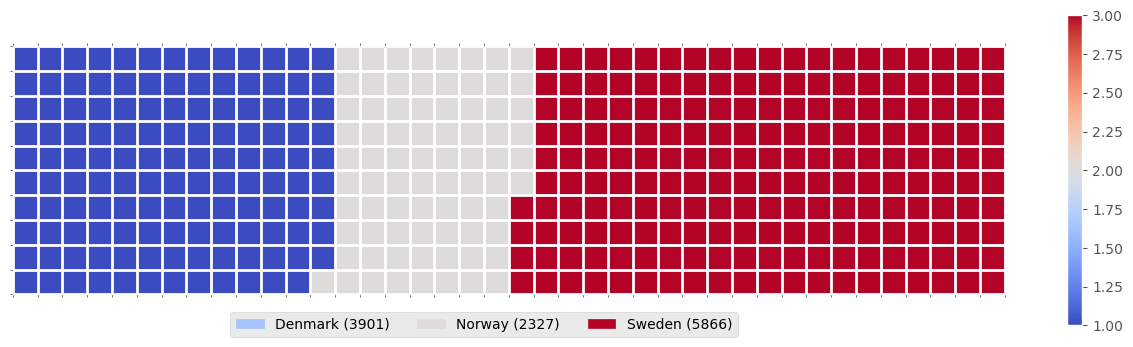

In [20]:
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

values_cumsum = np.cumsum(df_dns['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

legend_handles = []
for i, category in enumerate(df_dns.index.values):
    label_str = category + ' (' + str(df_dns['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dns.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

And there you go! What a good looking *delicious* `waffle` chart, don't you think?


Now it would very inefficient to repeat these seven steps every time we wish to create a `waffle` chart. So let's combine all seven steps into one function called *create_waffle_chart*. This function would take the following parameters as input:

> 1.  **categories**: Unique categories or classes in dataframe.
> 2.  **values**: Values corresponding to categories or classes.
> 3.  **height**: Defined height of waffle chart.
> 4.  **width**: Defined width of waffle chart.
> 5.  **colormap**: Colormap class
> 6.  **value_sign**: In order to make our function more generalizable, we will add this parameter to address signs that could be associated with a value such as %, $, and so on. **value_sign** has a default value of empty string.


In [25]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dns.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

Now to create a `waffle` chart, all we have to do is call the function `create_waffle_chart`. Let's define the input parameters:


In [26]:
width = 40 
height = 10

categories = df_dns.index.values
values = df_dns['Total']

colormap = plt.cm.coolwarm

And now let's call our function to create a `waffle` chart.


Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 640x480 with 0 Axes>

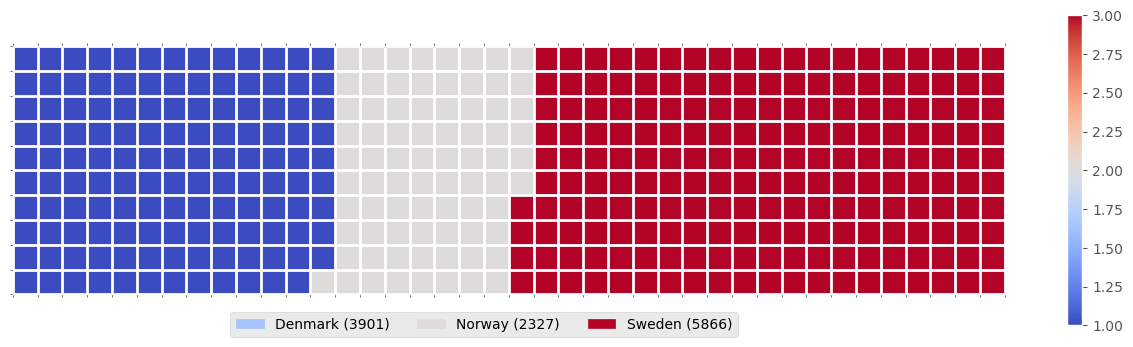

In [27]:
create_waffle_chart(categories, values, height, width, colormap)

There seems to be a new Python package for generating `waffle charts` called [PyWaffle](https://github.com/ligyxy/PyWaffle), <br><br>Let's create the same waffle chart with **pywaffle** now


In [28]:
!pip install pywaffle

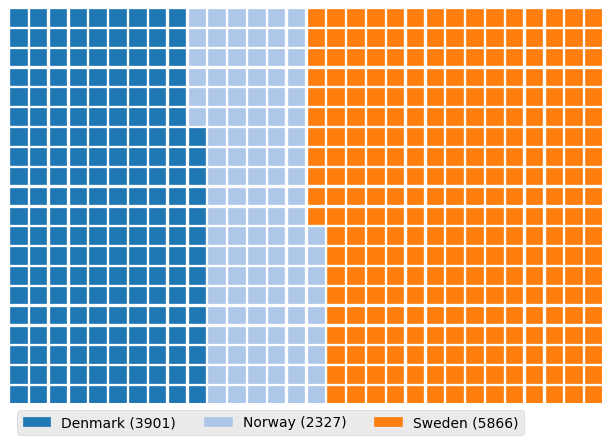

In [32]:
from pywaffle import Waffle


fig = plt.figure(FigureClass = Waffle,
                 rows = 20, columns = 30, 
                 values = df_dns['Total'],
                 cmap_name = 'tab20',
                 legend = {'labels': [f"{k} ({v})" for k, v in zip(df_dns.index.values,df_dns.Total)],
                            'loc': 'lower left', 'bbox_to_anchor':(0,-0.1),'ncol': 3}
                )

plt.show()

# Word Clouds <a id="4"></a>

`Word` clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.


Luckily, a Python package already exists in Python for generating `word` clouds. The package, called `word_cloud` was developed by **Andreas Mueller**.

Let's use this package to learn how to generate a word cloud for a given text document.


First, let's install the package.


In [33]:
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud imported!')

Wordcloud imported!


`Word` clouds are commonly used to perform high-level analysis and visualization of text data. Accordinly, let's digress from the immigration dataset and work with an example that involves analyzing text data. Let's try to analyze a short novel written by **Lewis Carroll** titled *Alice's Adventures in Wonderland*. Let's go ahead and download a *.txt* file of the novel.


In [34]:
import urllib

alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

Next, let's use the stopwords that we imported from `word_cloud`. We use the function *set* to remove any redundant stopwords.


In [39]:
stopwords = set(STOPWORDS)

In [35]:
# instantiate a word cloud object
alice_wc = WordCloud()

# generate the word cloud
alice_wc.generate(alice_novel)

Awesome! Now that the `word` cloud is created, let's visualize it.


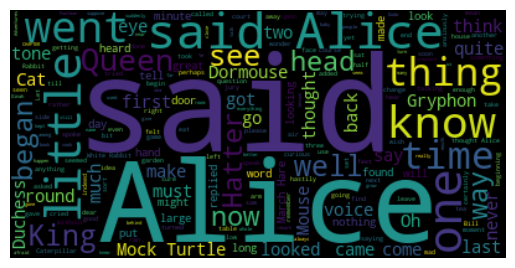

In [36]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Interesting! So in the first 2000 words in the novel, the most common words are **Alice**, **said**, **little**, **Queen**, and so on. Let's resize the cloud so that we can see the less frequent words a little better.


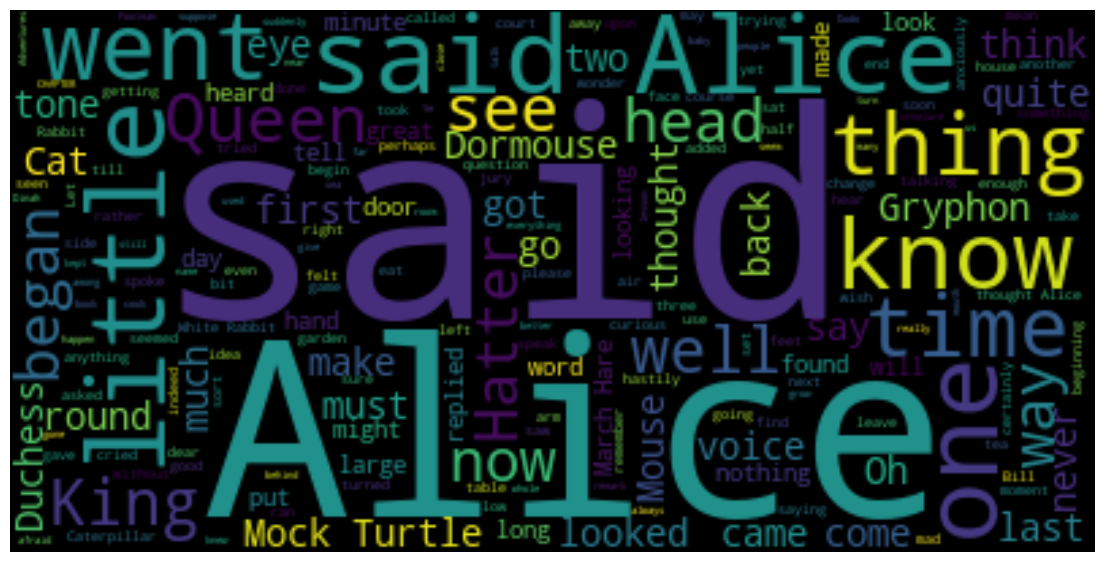

In [37]:
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Much better! However, **said** isn't really an informative word. So let's add it to our stopwords and re-generate the cloud.


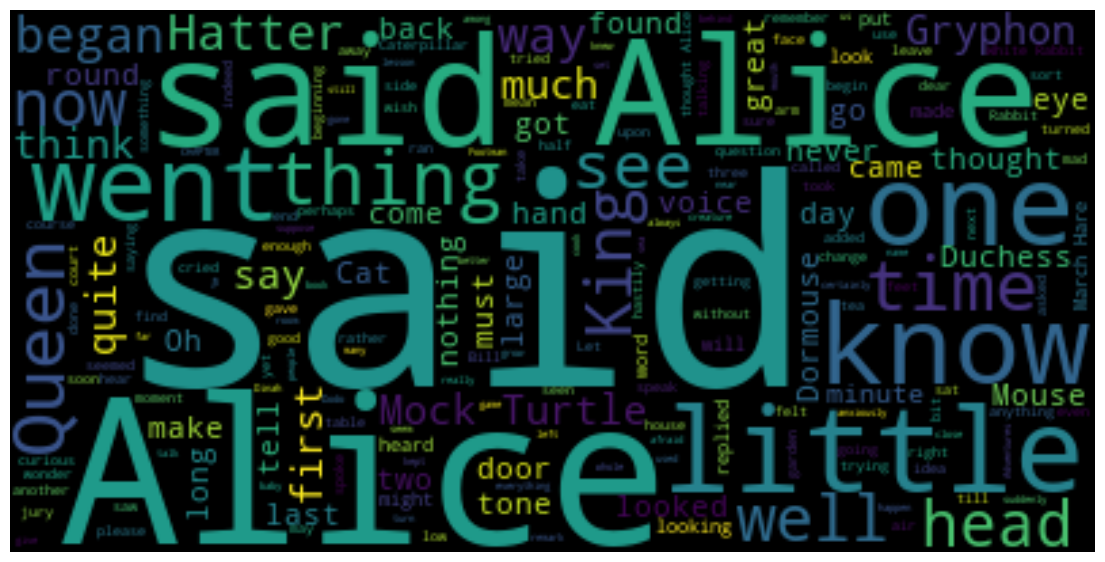

In [40]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Unfortunately, our immigration data does not have any text data, but where there is a will there is a way. Let's generate sample text data from our immigration dataset, say text data of 90 words.


Let's recall how our data looks like.


In [50]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


And what was the total immigration from 1980 to 2013?


In [51]:
total_immigrants = df_can['Total'].sum()
total_immigrants

6409153

Using countries with single-word names, let's duplicate each country's name based on how much they contribute to the total immigration.


In [54]:
max_words = 90
word_string = ''
for country in df_can.index.values:
     # check if country's name is a single-word name
    if country.count(" ") == 0:
        repeat_num_times = int(df_can.loc[country, 'Total'] / total_immigrants * max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)

# display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

We are not dealing with any stopwords here, so there is no need to pass them when creating the word cloud.


In [55]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


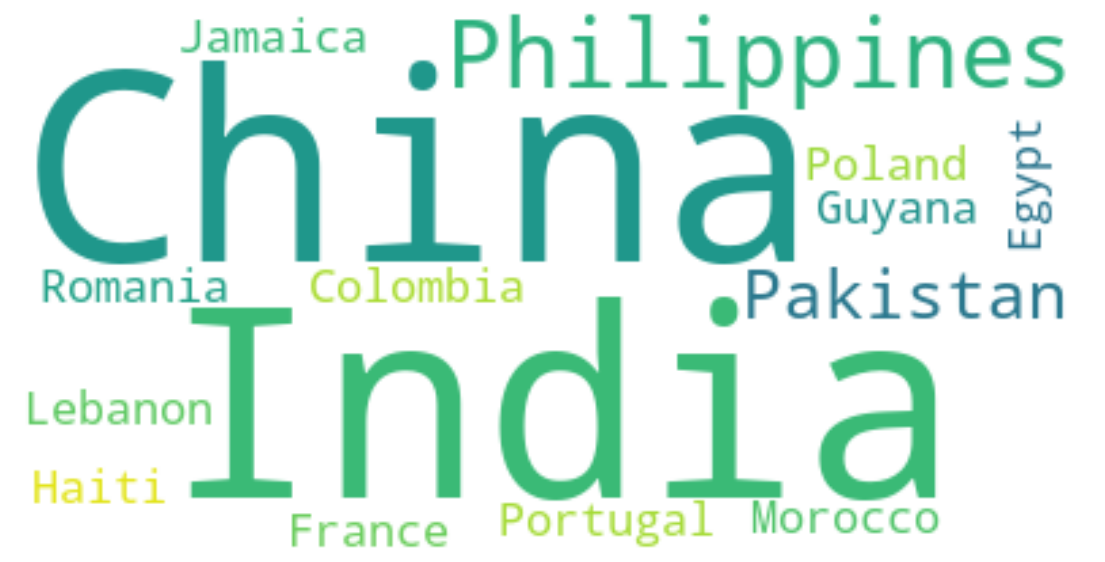

In [56]:
# display the cloud
plt.figure(figsize=(14, 18))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

According to the above word cloud, it looks like the majority of the people who immigrated came from one of 15 countries that are displayed by the word cloud. One cool visual that you could build, is perhaps using the map of Canada and a mask and superimposing the word cloud on top of the map of Canada. That would be an interesting visual to build!


# Plotting with Seaborn <a id="5"></a>

> Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. You can learn more about *seaborn* by following this [link](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) and more about *seaborn* regression plots by following this [link](http://seaborn.pydata.org/generated/seaborn.regplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).


### Categorical Plots
In our data 'df_can', let's find out how many continents are mentioned


In [61]:
df_can['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

### countplot
**A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.**
Let's find the count of Continents in the data 'df_can' using countplot on 'Continent'


<Axes: xlabel='Continent', ylabel='count'>

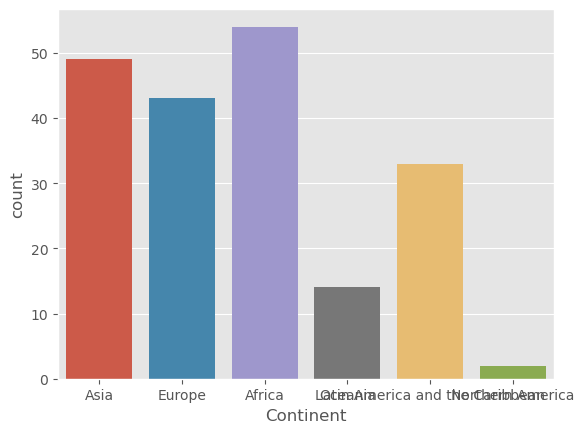

In [62]:
sns.countplot(x='Continent', data = df_can)

The labels on the x-axis doesnot look as expected.<br>Let's try to replace the 'Latin America and the Caribbean' with and "L-America", 'Northern America' with "N-America", <br>and change the figure size and then display the plot again


In [63]:
df_can1 = df_can.replace('Latin America and the Caribbean', 'L-America')
df_can1 = df_can1.replace('Northern America', 'N-America')

<Axes: xlabel='Continent', ylabel='count'>

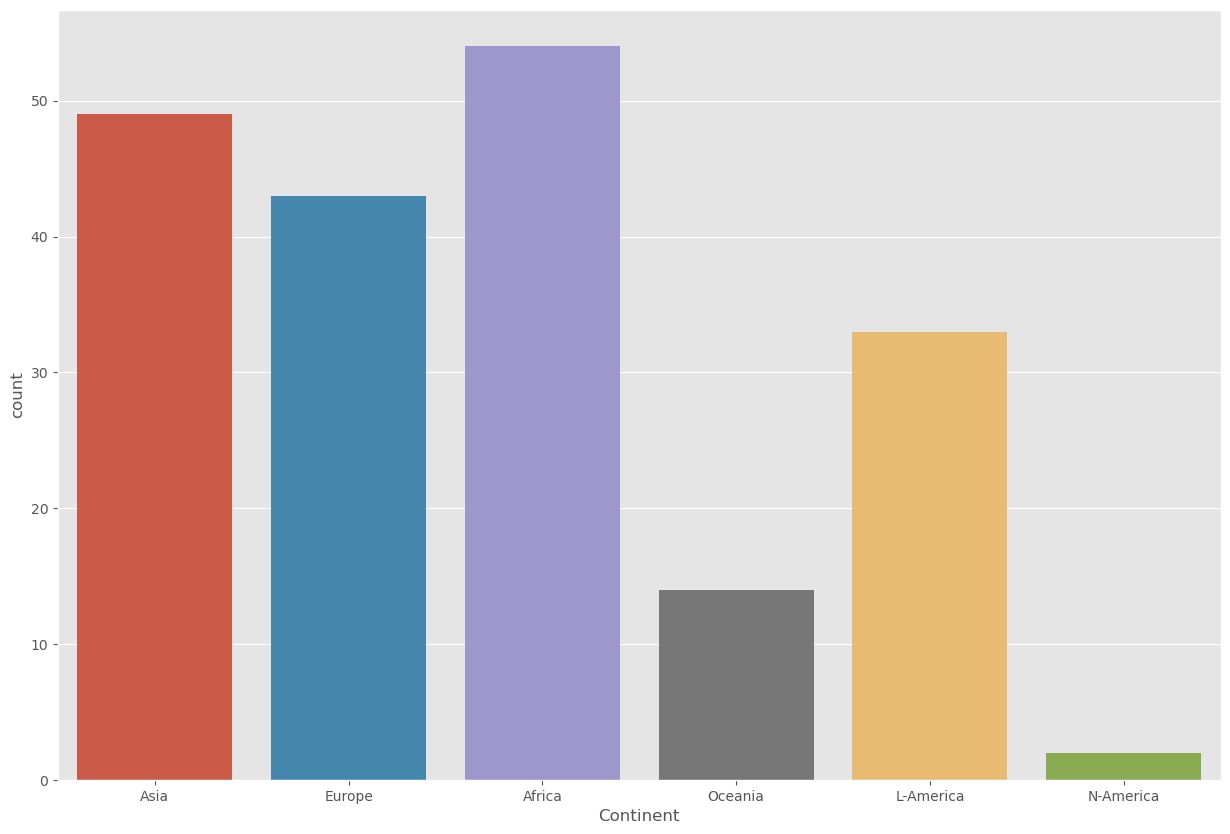

In [64]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Continent', data=df_can1)

Much better!


### Barplot
**This plot will perform the Groupby on a categorical varaible and plot aggregated values, with confidence intervals**.<br> Let's plot the total immigrants Continent-wise


<Axes: xlabel='Continent', ylabel='Total'>

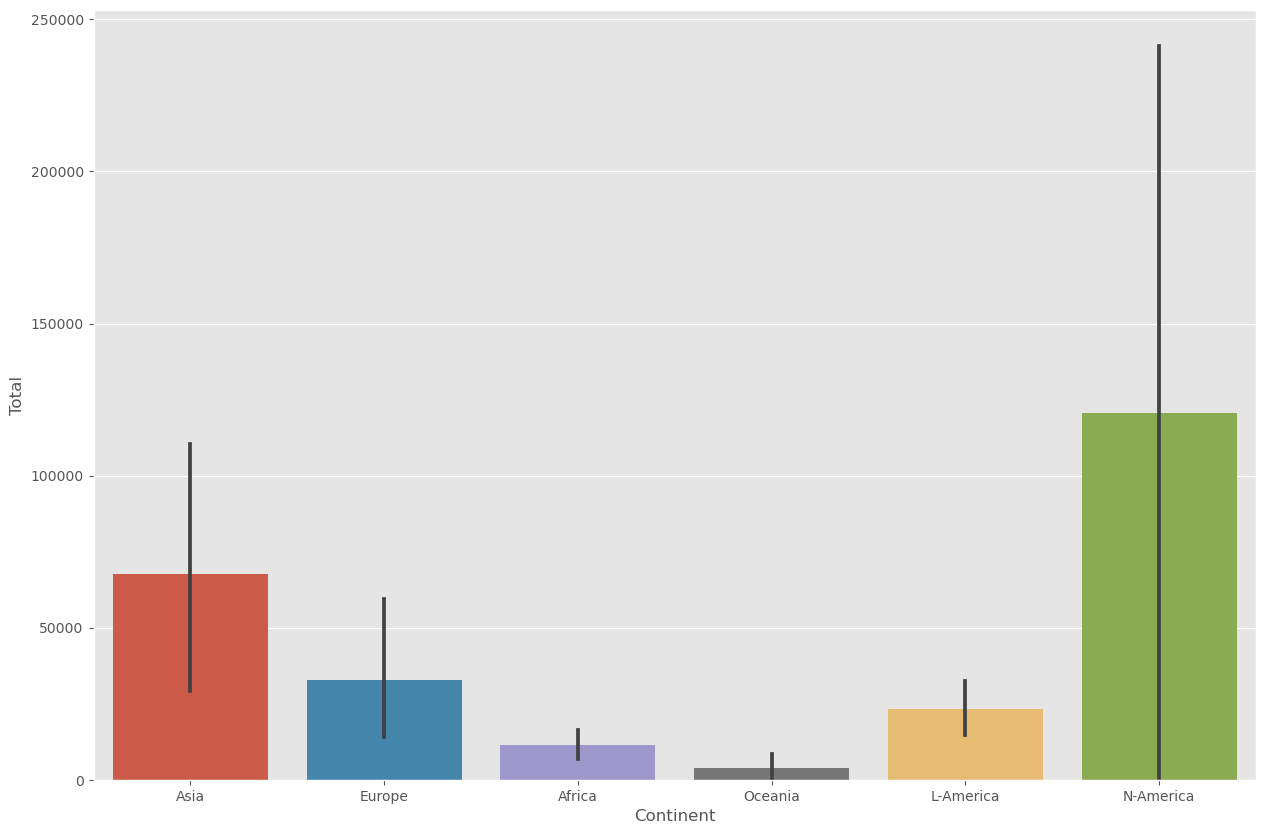

In [65]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Continent', y='Total', data=df_can1)

You can verify the values by performing the groupby on the Total and Continent for mean()


In [66]:
df_Can2=df_can1.groupby('Continent')['Total'].mean()
df_Can2

Continent
Africa        11462.000000
Asia          67710.081633
Europe        32812.720930
L-America     23186.303030
N-America    120571.000000
Oceania        3941.000000
Name: Total, dtype: float64

# Regression Plot <a id="6"></a>
With *seaborn*, generating a regression plot is as simple as calling the **regplot** function.


In [67]:
years = list(map(str, range(1980, 2014)))

df_tot = pd.DataFrame(df_can[years].sum(axis=0))

df_tot.index = map(float, df_tot.index)

df_tot.reset_index(inplace=True)

df_tot.columns = ['year', 'total']

df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


<Axes: xlabel='year', ylabel='total'>

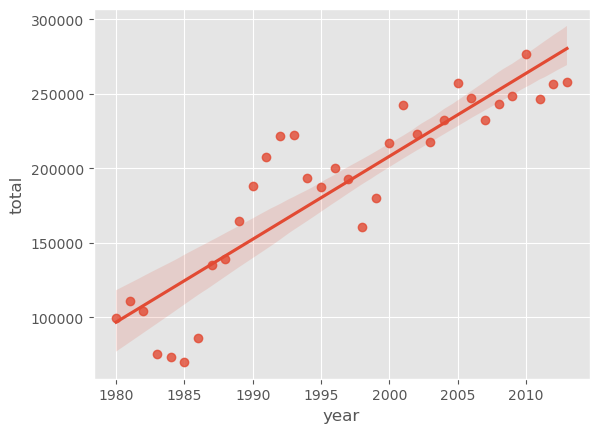

In [68]:
sns.regplot(x='year', y='total', data = df_tot)

This is not magic; it is *seaborn*! You can also customize the color of the scatter plot and regression line. Let's change the color to green.


<Axes: xlabel='year', ylabel='total'>

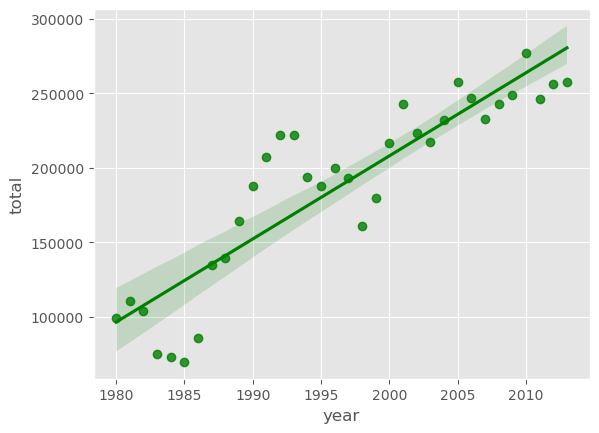

In [70]:
sns.regplot(x='year', y='total', data = df_tot, color = 'green')

You can always customize the marker shape, so instead of circular markers, let's use `+`.


<Axes: xlabel='year', ylabel='total'>

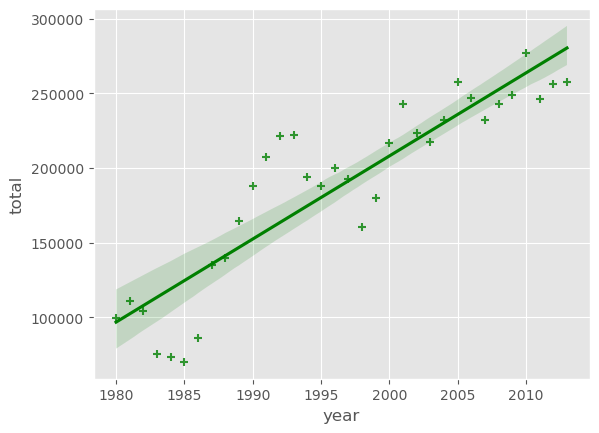

In [71]:
sns.regplot(x='year', y='total', data = df_tot, color = 'green', marker = '+' )

Let's blow up the plot a little so that it is more appealing to the sight.


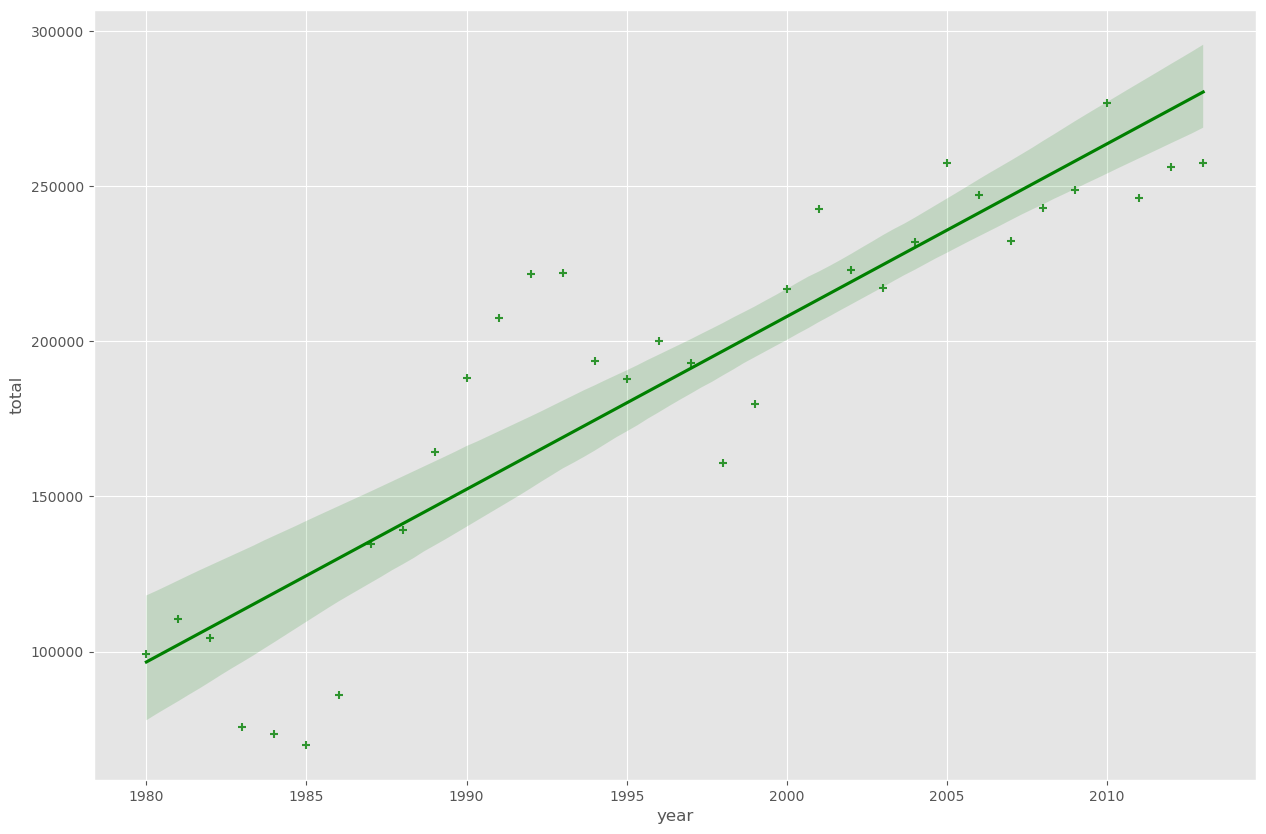

In [77]:
plt.figure(figsize=(15,10))

sns.regplot(x='year', y='total', data = df_tot, color = 'green', marker = '+')

plt.show()

And let's increase the size of markers so they match the new size of the figure, and add a title and x- and y-labels.


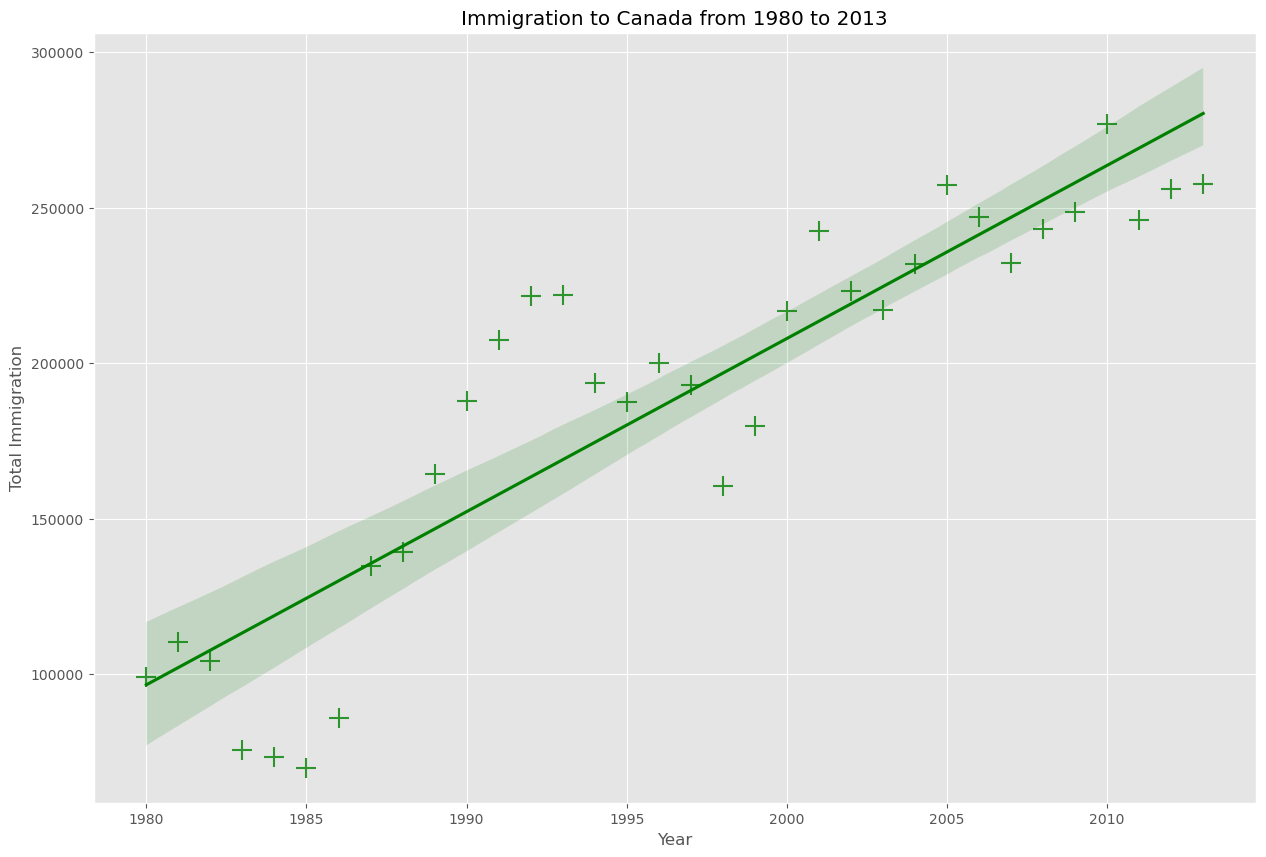

In [79]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='year', y='total', data = df_tot, marker='+', scatter_kws={'s': 200}, color = 'green' )

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Immigration to Canada from 1980 to 2013' )

plt.show()

And finally increase the font size of the tickmark labels, the title, and the x- and y-labels so they don't feel left out!


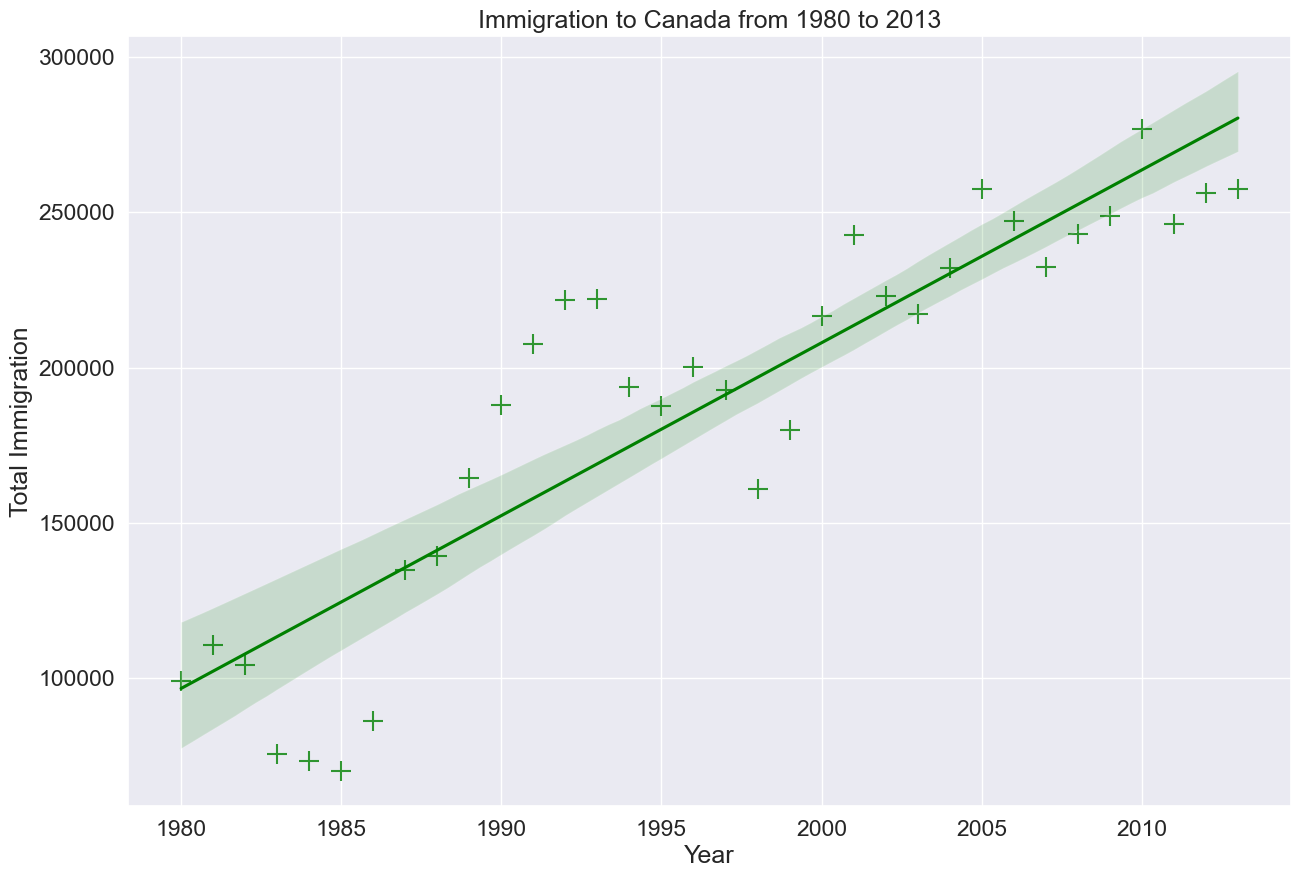

In [80]:
plt.figure(figsize=(15,10))

sns.set(font_scale = 1.5)

ax = sns.regplot(x='year', y='total', data = df_tot, marker='+', scatter_kws={'s': 200}, color = 'green' )

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Immigration to Canada from 1980 to 2013' )

plt.show()

**Question**: Use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.


In [82]:
df_countries = df_can.loc[['Denmark','Norway','Sweden'], years].sum().T

df_c = pd.DataFrame(df_countries)

df_c.reset_index(inplace=True)

df_c['index'] = df_c['index'].astype(int)

df_c.columns = ['year', 'total']
df_c.head(2)

,year,total
0,1980,669
1,1981,678


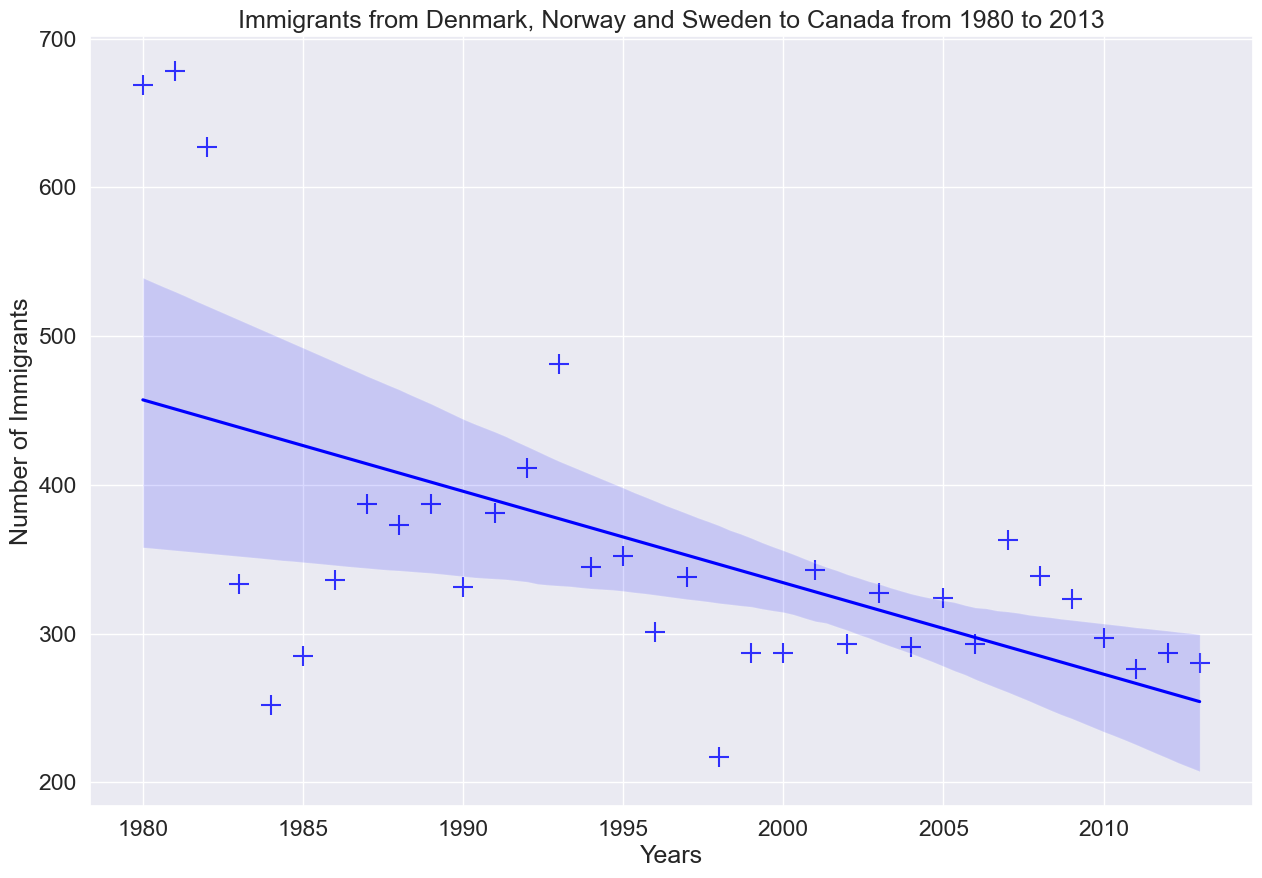

In [83]:
plt.figure(figsize=(15,10))

ax = sns.regplot(x='year', y='total', data = df_c, marker='+', scatter_kws = {'s':200}, color = 'blue')
ax.set(xlabel='Years', ylabel='Number of Immigrants')
ax.set_title('Immigrants from Denmark, Norway and Sweden to Canada from 1980 to 2013')

plt.show()

# Author

## Ajoku Obinna Sunday